In [3]:
import pandas as pd

# Read excel file with sheet name
df = pd.read_excel("c:\\users\\labdh\\Omnify_Assessment\\Omnify-Analyst-Intership-Task.xlsx", sheet_name=['Google Ads Data','Listing Site Data'])


In [4]:
Google_df = df.get('Google Ads Data')

In [5]:
Google_df['Week'] = pd.to_datetime(Google_df['Week'])
Google_df = Google_df.sort_values(by='Week')

(array([18659., 18673., 18687., 18701., 18718., 18732., 18748.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

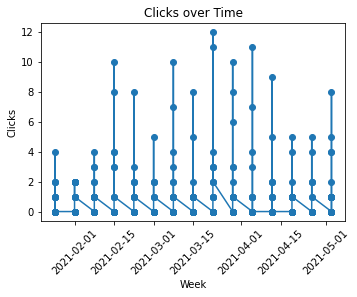

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

# Clicks over time
plt.subplot(2, 2, 1)
plt.plot(Google_df['Week'], Google_df['Clicks'], marker='o')
plt.title('Clicks over Time')
plt.xlabel('Week')
plt.ylabel('Clicks')
plt.xticks(rotation=45)

(array([18659., 18673., 18687., 18701., 18718., 18732., 18748.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

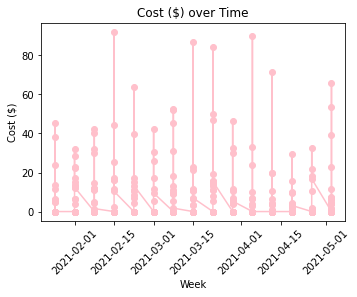

In [7]:
# Cost ($) over time
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 2)
plt.plot(Google_df['Week'], Google_df['Cost ($)'], marker='o', color='pink')
plt.title('Cost ($) over Time')
plt.xlabel('Week')
plt.ylabel('Cost ($)')
plt.xticks(rotation=45)

(array([18659., 18673., 18687., 18701., 18718., 18732., 18748.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

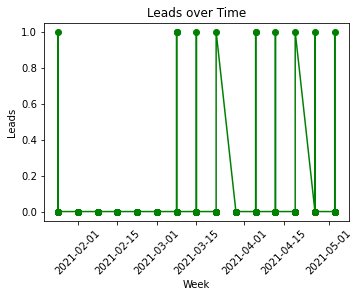

In [8]:
# Leads over time
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 3)
plt.plot(Google_df['Week'], Google_df['Leads'], marker='o', color='green')
plt.title('Leads over Time')
plt.xlabel('Week')
plt.ylabel('Leads')
plt.xticks(rotation=45) 

In [8]:
Google_df['Payment ($)']=Google_df['Payment ($)'].str.replace('$','')
Google_df['Payment ($)']=Google_df['Payment ($)'].str.replace(',','')
Google_df['Payment ($)'] = pd.to_numeric(Google_df['Payment ($)'])

C:\Users\labdh\AppData\Local\Temp\ipykernel_33056\498247817.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Google_df['Payment ($)']=Google_df['Payment ($)'].str.replace('$','')


(array([18659., 18673., 18687., 18701., 18718., 18732., 18748.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

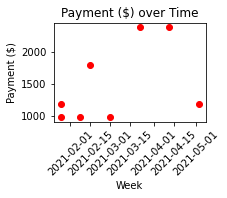

In [9]:
# Payment ($) over time
plt.subplot(2, 2, 4)
plt.plot(Google_df['Week'], Google_df['Payment ($)'], marker='o', color='red')
plt.title('Payment ($) over Time')
plt.xlabel('Week')
plt.ylabel('Payment ($)')
plt.xticks(rotation=45)

In [10]:
List_df = df.get('Listing Site Data')

In [11]:
List_df['Date of Report'] = pd.to_datetime(List_df['Date of Report'])
time_series_data = List_df.groupby('Date of Report').agg({
    'Clicks': 'sum',
    'Money Spent ($)': 'sum'
}).reset_index()

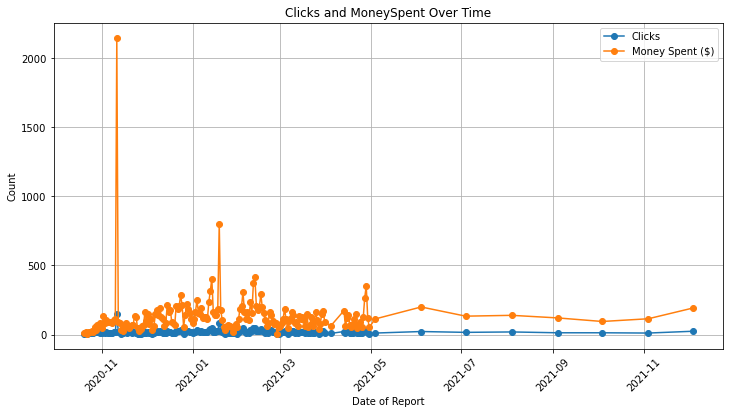

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Date of Report'], time_series_data['Clicks'], marker='o', label='Clicks')
plt.plot(time_series_data['Date of Report'], time_series_data['Money Spent ($)'], marker='o', label='Money Spent ($)')
plt.title('Clicks and MoneySpent Over Time')
plt.xlabel('Date of Report')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [15]:
List_df['Paid']=List_df['Paid'].str.replace('$','')
List_df['Paid']=List_df['Paid'].str.replace(',','')
List_df['Paid'] = pd.to_numeric(List_df['Paid'])

C:\Users\labdh\AppData\Local\Temp\ipykernel_33056\3372762533.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  List_df['Paid']=List_df['Paid'].str.replace('$','')


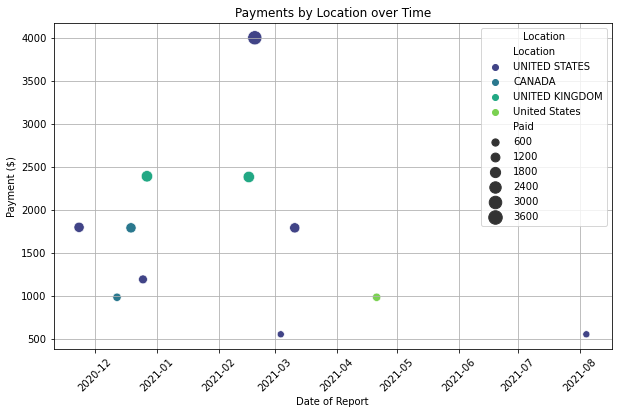

In [18]:
import seaborn as sns
df_payment_made = List_df[List_df['Paid'] > 0]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Date of Report', y='Paid', hue='Location', size='Paid', data=df_payment_made, palette='viridis', sizes=(50, 200))
plt.title('Payments by Location over Time')
plt.xlabel('Date of Report')
plt.ylabel('Payment ($)')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.grid(True)
plt.show()

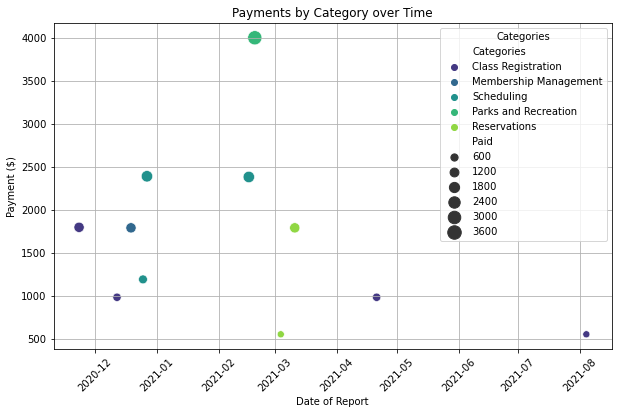

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Date of Report', y='Paid', hue='Categories', size='Paid', data=df_payment_made, palette='viridis', sizes=(50, 200))
plt.title('Payments by Category over Time')
plt.xlabel('Date of Report')
plt.ylabel('Payment ($)')
plt.xticks(rotation=45)
plt.legend(title='Categories')
plt.grid(True)
plt.show()